In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pyodbc as pb
%matplotlib inline
warnings.filterwarnings('ignore')
import folium

In [2]:
server = 'ANUKUL\SQLEXPRESS'
database = 'Delhi_Metro'

In [3]:
connection = pb.connect('DRIVER={SQL Server};SERVER='+server+';DATABASE='+database)

In [4]:
table_name = 'Delhi_Metro_Network'
df = pd.read_sql_query(f'Select * from {table_name}',connection)

In [5]:
df

,Station_ID,Station_Name,Distance_from_Start_km,Line,Opening_Date,Station_Layout,Latitude,Longitude
0,1,Jhil Mil,10.300000,Red line,2008-04-06,Elevated,28.675791,77.312393
1,2,Welcome [Conn: Red],46.799999,Pink line,2018-10-31,Elevated,28.671801,77.277557
2,3,DLF Phase 3,10.000000,Rapid Metro,2013-11-14,Elevated,28.493601,77.093498
3,4,Okhla NSIC,23.799999,Magenta line,2017-12-25,Elevated,28.554483,77.264847
4,5,Dwarka Mor,10.200000,Blue line,2005-12-30,Elevated,28.619320,77.033257
...,...,...,...,...,...,...,...,...
280,281,Bata Chowk,38.299999,Voilet line,2015-06-09,Elevated,28.385836,77.313461
281,282,Dwarka Sector 12,5.800000,Blue line,2006-01-04,Elevated,28.592319,77.040512
282,283,Noida Sector 18,43.599998,Blue line,2009-12-11,Elevated,28.570810,77.326118
283,284,Knowledge Park II,21.400000,Aqua line,2019-01-25,Elevated,28.456867,77.500053


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Station_ID              285 non-null    int64  
 1   Station_Name            285 non-null    object 
 2   Distance_from_Start_km  285 non-null    float64
 3   Line                    285 non-null    object 
 4   Opening_Date            285 non-null    object 
 5   Station_Layout          285 non-null    object 
 6   Latitude                285 non-null    float64
 7   Longitude               285 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 17.9+ KB


In [7]:
df.describe()

,Station_ID,Distance_from_Start_km,Latitude,Longitude
count,285.000000,285.000000,285.000000,285.000000
mean,143.000000,19.218947,28.595428,77.029315
std,82.416625,14.002862,0.091316,2.875400
min,1.000000,0.000000,27.920862,28.698807
25%,72.000000,7.300000,28.545828,77.107132
50%,143.000000,17.400000,28.613453,77.207222
75%,214.000000,28.799999,28.666361,77.281166
max,285.000000,52.700001,28.878965,77.554482


In [8]:
df.describe(include=object)

,Station_Name,Line,Opening_Date,Station_Layout
count,285,285,285,285
unique,283,13,48,3
top,Yamuna Bank,Blue line,2005-12-30,Elevated
freq,2,49,22,214


In [10]:
df.isnull().sum()

Station_ID                0
Station_Name              0
Distance_from_Start_km    0
Line                      0
Opening_Date              0
Station_Layout            0
Latitude                  0
Longitude                 0
dtype: int64

In [11]:
df.head()

,Station_ID,Station_Name,Distance_from_Start_km,Line,Opening_Date,Station_Layout,Latitude,Longitude
0,1,Jhil Mil,10.300000,Red line,2008-04-06,Elevated,28.675791,77.312393
1,2,Welcome [Conn: Red],46.799999,Pink line,2018-10-31,Elevated,28.671801,77.277557
2,3,DLF Phase 3,10.000000,Rapid Metro,2013-11-14,Elevated,28.493601,77.093498
3,4,Okhla NSIC,23.799999,Magenta line,2017-12-25,Elevated,28.554483,77.264847
4,5,Dwarka Mor,10.200000,Blue line,2005-12-30,Elevated,28.619320,77.033257


In [12]:
df.tail()

,Station_ID,Station_Name,Distance_from_Start_km,Line,Opening_Date,Station_Layout,Latitude,Longitude
280,281,Bata Chowk,38.299999,Voilet line,2015-06-09,Elevated,28.385836,77.313461
281,282,Dwarka Sector 12,5.800000,Blue line,2006-01-04,Elevated,28.592319,77.040512
282,283,Noida Sector 18,43.599998,Blue line,2009-12-11,Elevated,28.570810,77.326118
283,284,Knowledge Park II,21.400000,Aqua line,2019-01-25,Elevated,28.456867,77.500053
284,285,Mayur Vihar Extention,39.500000,Blue line,2009-12-11,Elevated,28.594158,77.294586


In [35]:
df['Opening_Date'] = pd.to_datetime(df['Opening_Date'])

In [15]:
df['Line'].value_counts()

Line
Blue line            49
Pink line            38
Yellow line          37
Voilet line          34
Red line             29
Magenta line         25
Aqua line            21
Green line           21
Rapid Metro          11
Blue line branch      8
Orange line           6
Gray line             3
Green line branch     3
Name: count, dtype: int64

<AxesSubplot: xlabel='Line'>

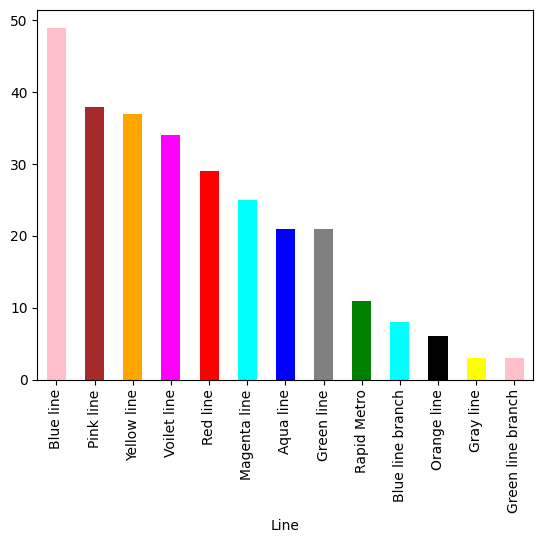

In [28]:
df['Line'].value_counts().plot(kind='bar',color={'blue','pink','yellow','black','red','magenta','aqua','green','brown','cyan','orange','gray','green'})

In [30]:
line_colors = {
    'Red line': 'red',
    'Blue line': 'blue',
    'Yellow line': 'beige',
    'Green line': 'green',
    'Voilet line': 'purple',
    'Pink line': 'pink',
    'Magenta line': 'darkred',
    'Orange line': 'orange',
    'Rapid Metro': 'cadetblue',
    'Aqua line': 'black',
    'Green line branch': 'lightgreen',
    'Blue line branch': 'lightblue',
    'Gray line': 'lightgray'
}

In [32]:
delhi_map_with_line_tooltip = folium.Map(location=[28.7041, 77.1025], zoom_start=11)

# adding colored markers for each metro station with line name in tooltip
for index, row in df.iterrows():
    line = row['Line']
    color = line_colors.get(line, 'black')  # Default color is black if line not found in the dictionary
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"{row['Station_Name']}",
        tooltip=f"{row['Station_Name']}, {line}",
        icon=folium.Icon(color=color)
    ).add_to(delhi_map_with_line_tooltip)

# Displaying the updated map
delhi_map_with_line_tooltip

In [37]:
df.head()

,Station_ID,Station_Name,Distance_from_Start_km,Line,Opening_Date,Station_Layout,Latitude,Longitude,Opening_Year
0,1,Jhil Mil,10.300000,Red line,2008-04-06,Elevated,28.675791,77.312393,2008
1,2,Welcome [Conn: Red],46.799999,Pink line,2018-10-31,Elevated,28.671801,77.277557,2018
2,3,DLF Phase 3,10.000000,Rapid Metro,2013-11-14,Elevated,28.493601,77.093498,2013
3,4,Okhla NSIC,23.799999,Magenta line,2017-12-25,Elevated,28.554483,77.264847,2017
4,5,Dwarka Mor,10.200000,Blue line,2005-12-30,Elevated,28.619320,77.033257,2005


In [36]:
df['Opening_Year'] = df['Opening_Date'].dt.year

<AxesSubplot: xlabel='Opening_Year'>

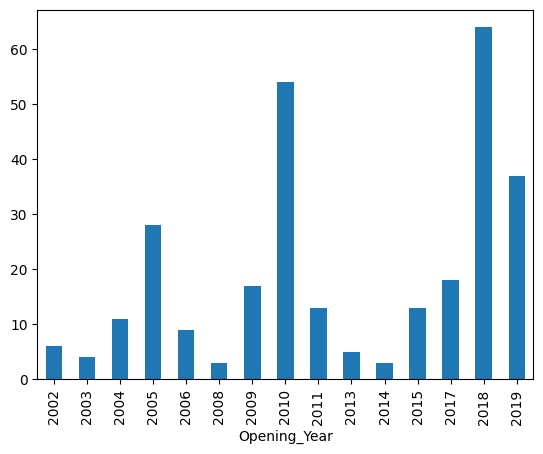

In [42]:
df.groupby('Opening_Year')['Opening_Year'].count().plot(kind='bar')

In [44]:
df.groupby('Line')['Distance_from_Start_km'].mean()

Line
Aqua line            13.352381
Blue line            26.144898
Blue line branch      4.000000
Gray line             1.800000
Green line           11.380952
Green line branch     1.066667
Magenta line         17.656000
Orange line          10.566667
Pink line            28.773684
Rapid Metro           5.709091
Red line             16.558621
Voilet line          20.617647
Yellow line          21.462162
Name: Distance_from_Start_km, dtype: float64

<AxesSubplot: xlabel='Station_Layout', ylabel='count'>

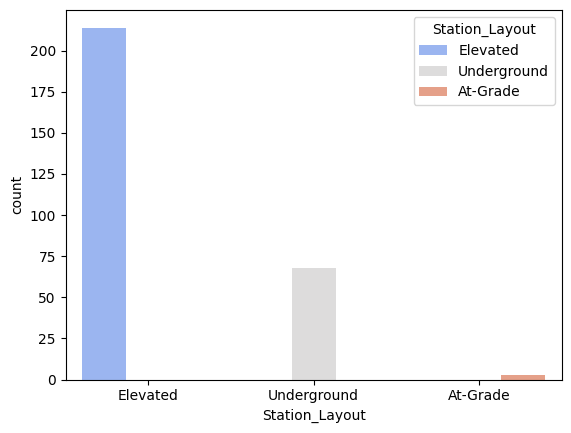

In [52]:
sns.countplot(x='Station_Layout',data=df,palette='coolwarm',hue='Station_Layout')
